# <span style = "color:blue">Lab 8 Exercise</span>
<div class = "alert alert-danger">
Name your file after your student (matric) number, for example, A1234567B_Lab7Ex.ipynb

Please let the lab facilitator check your work and mark your attendance before leaving the lab.
</div>

## <span style = "color:blue">Question 1</span>
Some infections, for example, those from the common cold and influenza, do not confer any long-lasting immunity upon recovery, and individuals become susceptible again. The SIS model can be used to study the behaviour of such infections.

In the SIS model, there are only two compartments in a fixed population:

- $S(t)$ (susceptible) represents individuals of the population not yet infected with the disease at time $t$, or those susceptible in the population.
- $I(t)$ (infectious) represents individuals of the population who have been infected with the disease and are capable of infecting others in the susceptible group. Once recovered, they are back to the susceptible population.

The normalised SIS formulation consists of the following set of coupled ordinary differential equations: 

$$ \frac{dS'}{dt} = -rI'(R_{0}S'-1) $$ 
$$ \frac{dI'}{dt} = rI'(R_{0}S'-1) $$ 

$r$ is the rate of recovery and $R_{0}$ is the basic reproductive number or ratio and is dependent on the parameter for infectivity ($R_{0} = \dfrac{\beta N}{r}$ where $N$ is the total population assumed to be a constant). 

You are to solve for the set of coupled ordinary differential equations in the SIS model and plot both the susceptible and infected populations on the same graph for $r = 1.0$ and $U0 = [1.0, 0.001]$. Create four plots with $R0$ taking on the following values:

(a) 1.5

(b) 2.0

(c) 3.0

(d) 4.0

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class Model:
    def __init__(self, R0, r=1.0, U0=[1.0, 0.001]):
        self.R0 = R0
        self.U0 = U0
        self.r = r
        
        self.tmax = 80
        self.ticks = 50*self.tmax   # Further division of t interval
        self.t = np.linspace(0, self.tmax, self.ticks)
        
    def model(self, U, t):
        S, I = U
        dSdt = -self.r*I * (self.R0*S - 1)
        dIdt = self.r*I*(self.R0*S-1)
        return dSdt, dIdt
    
    @property
    def Uns(self):
        return odeint(self.model, self.U0, self.t)
        
    @property
    def SI(self):
        Uns = self.Uns
        S = Uns[:,0]   # Extract the first column of data from Uns which contains the solutions for S
        I = Uns[:,1]   # Extract the second column of data from Uns which contains the solutions for I
        return S,I
    
models = [Model(R0=1.5), Model(R0=2.0), Model(R0=3.0), Model(R0=4.0)]

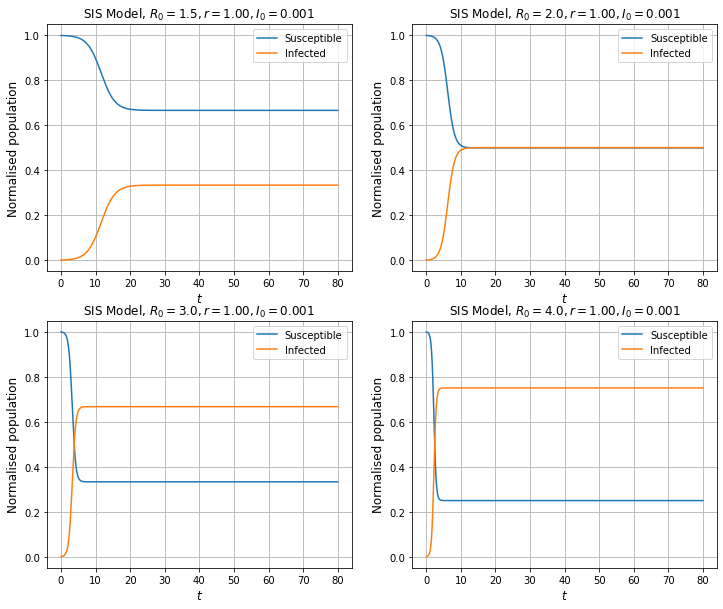

In [22]:
plt.figure(figsize=(12,10))

for i in range(len(models)):
    model = models[i]
    plt.subplot(2,2,i+1)
    
    S,I = model.SI
           
    # Plot graphs
    plt.plot(model.t,S,label='Susceptible')
    plt.plot(model.t,I,label='Infected')
    
    plt.title(f"SIS Model, $R_0 = {model.R0}, r = {model.r:.2f}, I_0 = {model.U0[1]}$")   # corresponding to maxI
    plt.xlabel("$t$", fontsize=12)
    plt.ylabel("Normalised population", fontsize=12) 
    plt.legend()
    plt.grid()
    

## <span style = "color:blue">Question 2</span>
Referring to the code in Lab 8 on the visualisation of SG Covid data during the Delta virus spread, do a similar plot for the case of the first wave of the Omicron virus which occurs around 2021-12-01 to 2022-05-01.

In [35]:
import pandas as pd

df = pd.read_csv("Covid.csv")
df['date'] = pd.to_datetime(df['date'])
display(df.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
178946,SGP,Asia,Singapore,2021-12-02,267150.0,1101.0,1195.000,735.0,9.0,7.714,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178947,SGP,Asia,Singapore,2021-12-03,267916.0,766.0,1148.714,744.0,9.0,8.571,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178948,SGP,Asia,Singapore,2021-12-04,268659.0,743.0,1003.286,746.0,2.0,8.000,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178949,SGP,Asia,Singapore,2021-12-05,269211.0,552.0,975.429,759.0,13.0,8.286,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
178950,SGP,Asia,Singapore,2021-12-06,269873.0,662.0,912.429,763.0,4.0,7.571,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN


Highest caseload of 39252 (per million) occurs on 2022-03-09


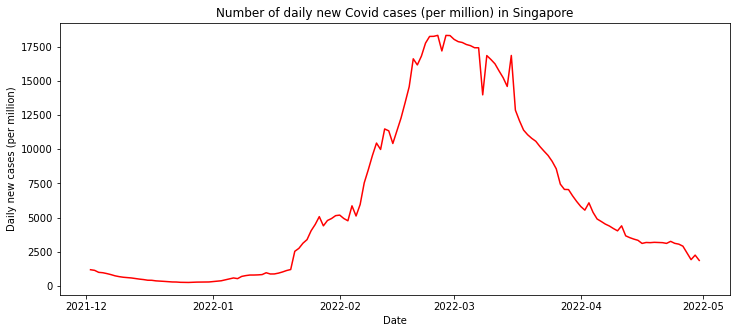

In [38]:
sg_df = df[(df['iso_code'] == 'SGP') & (df['date']>'2021-12-01') & (df['date']<'2022-05-01')]   # Set conditions 
display(sg_df.head())   # For a nicer display of data records

sg = pd.DataFrame(sg_df).to_numpy()   # Prepare for numeric plotting

maxCase = np.max(sg[:,5])    # Retrieve max infected population
index = np.argmax(sg[:,5])   # Retrieve row index that corresponds to where maxCase is
date = sg[index,3]           # Retrieve date that corresponds to maxCase
print(f"Highest caseload of {maxCase:.0f} (per million) occurs on {date.date()}")   # .date() extracts date without 

# Plot Singapore's COVID data
plt.figure(figsize=(12,5))
plt.plot(sg[:,3],sg[:,6],"r")   # 4th field is date; 7th field is daily new cases (smoothed)
plt.title("Number of daily new Covid cases (per million) in Singapore")
plt.ylabel("Daily new cases (per million)"); plt.xlabel("Date")
plt.show()